In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from gridworld_env import GridworldEnv
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
env = GridworldEnv('1') # Number of task 

/Users/samueloliveira/opt/anaconda3/envs/maai-env/lib/python3.12/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


# Q-Learning with rollout

In [3]:
def updatefig(j):
    # set the data in the axesimage object
    im.set_array(env.grid_images[j])
    # return the artists set
    return [im]

In [21]:
# Q learning params
ALPHA = 0.2 # learning rate
GAMMA = 0.99 # reward discount
TAU=0.5
LEARNING_COUNT = 300
TEST_COUNT = 100
BETA=1/TAU

TURN_LIMIT = 1000
record=True
from algorithms.Q_Learning import Q_Learning_Agents

env = GridworldEnv('1')
env.reset()
agents = Q_Learning_Agents(env,LEARNING_COUNT,TURN_LIMIT,ALPHA,GAMMA)

print("###### LEARNING #####")
reward_total_1 = 0.0
reward_total_2 = 0.0
for j in range(LEARNING_COUNT):
    if j==3000:
        epsilon = agents.update_epsilon(j)
        total_reward,reward_1,reward_2=agents.learn(epsilon,True)
        print("GAME "+str(j)+"\n")
        fig = plt.figure() # make figure

        # make axesimage object
        # the vmin and vmax here are very important to get the color map correct
        im = plt.imshow(env.grid_images[0])
        # kick off the animation
        ani = animation.FuncAnimation(fig, updatefig, frames=range(len(env.grid_images)),interval=50)
        ani.save(filename="images/q_learning/{h}.gif".format(h=j), writer="pillow")
    else:
        epsilon = agents.update_epsilon(j)
        total_reward,reward_1,reward_2=agents.learn(epsilon)
        print("GAME "+str(j)+"\n")

    #print(reward_1)
    #print(reward_2)
    reward_total_1 += reward_1
    reward_total_2 += reward_2
print("episodes      : {}".format(LEARNING_COUNT))
print("agent 1 total reward  : {}".format(reward_total_1))
print("agent 1 average reward: {:.2f}".format(reward_total_1 / LEARNING_COUNT))
#print("agent 1 Q Value       :{}".format(agent.q_val))
print("agent 2 total reward  : {}".format(reward_total_2))
print("agent 2 average reward: {:.2f}".format(reward_total_2 / LEARNING_COUNT))

/Users/samueloliveira/opt/anaconda3/envs/maai-env/lib/python3.12/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


###### LEARNING #####
GAME 0

GAME 1

GAME 2

GAME 3

GAME 4

GAME 5

GAME 6

GAME 7

GAME 8

GAME 9

GAME 10

GAME 11

GAME 12

GAME 13

GAME 14

GAME 15

GAME 16

GAME 17

GAME 18

GAME 19

GAME 20

GAME 21

GAME 22

GAME 23

GAME 24

GAME 25

GAME 26

GAME 27

GAME 28

GAME 29

GAME 30

GAME 31

GAME 32

GAME 33

GAME 34

GAME 35

GAME 36

GAME 37

GAME 38

GAME 39

GAME 40

GAME 41

GAME 42

GAME 43

GAME 44

GAME 45

GAME 46

GAME 47

GAME 48

GAME 49

GAME 50

GAME 51

GAME 52

GAME 53

GAME 54

GAME 55

GAME 56

GAME 57

GAME 58

GAME 59

GAME 60

GAME 61

GAME 62

GAME 63

GAME 64

GAME 65

GAME 66

GAME 67

GAME 68

GAME 69

GAME 70

GAME 71

GAME 72

GAME 73

GAME 74

GAME 75

GAME 76

GAME 77

GAME 78

GAME 79

GAME 80

GAME 81

GAME 82

GAME 83

GAME 84

GAME 85

GAME 86

GAME 87

GAME 88

GAME 89

GAME 90

GAME 91

GAME 92

GAME 93

GAME 94

GAME 95

GAME 96

GAME 97

GAME 98

GAME 99

GAME 100

GAME 101

GAME 102

GAME 103

GAME 104

GAME 105

GAME 106

GAME 107

GAME 108

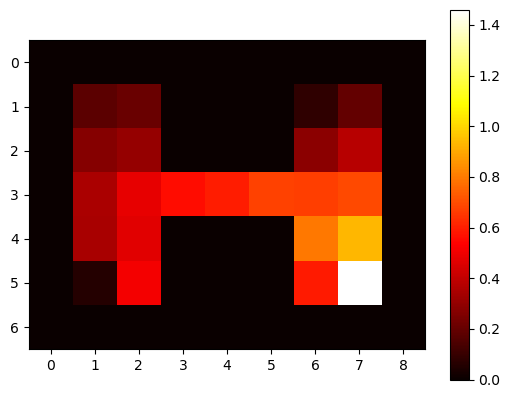

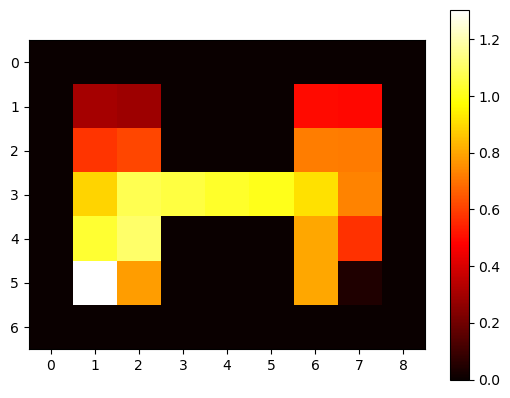

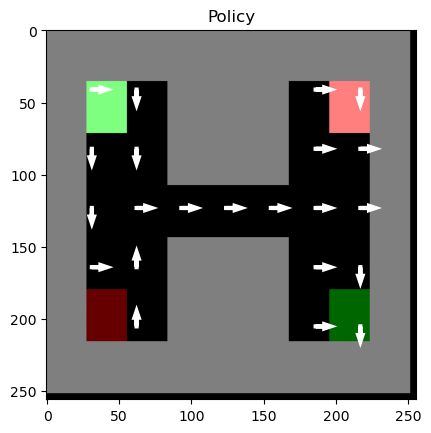

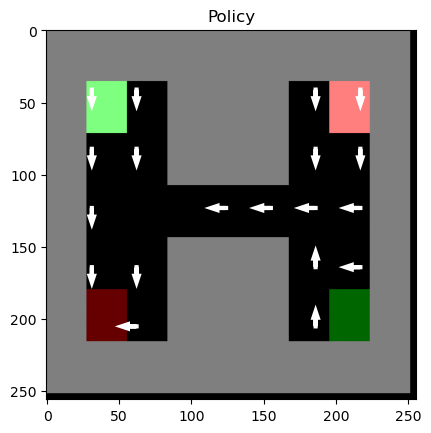

In [22]:
Q_a1 = agents.q_val_1
Q_a1_fixed_p2=Q_a1[:,:,5,1,:,:,:]
#Q_a1_fixed_p2=Q_a1
Q_a1_mean=np.mean(Q_a1_fixed_p2,axis=tuple(i for i in range(Q_a1_fixed_p2.ndim) if i != 0 and i!=1 and i!=4))

#print(Q_a1_mean[:,:,0])
policy_function1 = np.argmax(Q_a1_mean , axis = 2)

Q_a2 = agents.q_val_2 
Q_a2_fixed_p1=Q_a2[5,7,:,:,:,:,:]
#Q_a2_fixed_p1=Q_a2
#print(Q_a2_fixed_p1.shape)
Q_a2_mean=np.mean(Q_a2_fixed_p1,axis=tuple(i for i in range(Q_a2_fixed_p1.ndim) if i != 0 and i!=1 and i!=4))

#print([i for i in range(Q_a2_fixed_p1.ndim) if (i != 0 and i!=1)])
Q1=np.mean(agents.q_val_1,axis=tuple(i for i in range(agents.q_val_1.ndim) if (i != 0 and i!=1)))

#Q1=np.mean(Q1,axis=(2,3))
plt.figure()
plt.imshow(Q1, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



Q=np.mean(agents.q_val_2,axis=tuple(i for i in range(agents.q_val_2.ndim) if (i != 2 and i!=3)))
#print(Q.shape)
#Q=np.mean(Q,axis=(2,3))
policy_function2 = np.argmax( Q_a2_mean , axis = 2)
plt.figure()
plt.imshow(Q, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



def plot_policy( policy_function ):

    #plt.figure()
    env.reset()
    img=env.render('rgb_array')

    plt.imshow( img.astype('float')/255.0)

    
    for row in range( policy_function.shape[0] ):
        for col in range( policy_function.shape[1] ):
            if policy_function[row,col] == 0:
                continue 
            if policy_function[row,col] == 1:
                dx = 0; dy = .5
            if policy_function[row,col] == 2:
                dx = 0; dy = -.5
            if policy_function[row,col] == 3:
                dx = -.5; dy = 0
            if policy_function[row,col] == 4:
                dx = .5; dy = 0
            plt.arrow( col*31 , row*41 , dx*12, dy*12 ,shape='full', fc='w' , ec='w' ,lw=3, head_width=3)
            #plt.quiver(col*31,row*40,dx,dy ,color=(1.0,1.0,1.0))
    plt.title( 'Policy' )        
    plt.show() 
plot_policy(policy_function1)
plot_policy(policy_function2)

# SOFT Q-LEARNING BASELINE

In [ ]:
# Q learning params
ALPHA = 0.2 # learning rate
GAMMA = 0.99 # reward discount
TAU=1
LEARNING_COUNT = 200
TEST_COUNT = 100
BETA=1/TAU

TURN_LIMIT = 1000
IS_MONITOR = True
from algorithms.Soft_Q_Learning_Baseline import Soft_Q_Learning_Baseline_Agents


env = GridworldEnv('1')
env.reset()
agents = Soft_Q_Learning_Baseline_Agents(env,LEARNING_COUNT,TURN_LIMIT,ALPHA,GAMMA,TAU)

print("###### LEARNING #####")
reward_total_1 = 0.0
reward_total_2 = 0.0
for j in range(LEARNING_COUNT):
    if j==1000:
        total_reward,reward_1,reward_2=agents.learn(True)
        print("GAME "+str(j)+"\n")
        fig = plt.figure() # make figure

        # make axesimage object
        # the vmin and vmax here are very important to get the color map correct
        im = plt.imshow(env.grid_images[0])
        # kick off the animation
        ani = animation.FuncAnimation(fig, updatefig, frames=range(len(env.grid_images)),interval=50)
        ani.save(filename="images/soft_q_baseline/{h}.gif".format(h=j), writer="pillow")
    else:
        total_reward,reward_1,reward_2=agents.learn()
        print("GAME "+str(j)+"\n")

    print(reward_1)
    print(reward_2)
    reward_total_1 += reward_1
    reward_total_2 += reward_2
print("episodes      : {}".format(LEARNING_COUNT))
print("agent 1 total reward  : {}".format(reward_total_1))
print("agent 1 average reward: {:.2f}".format(reward_total_1 / LEARNING_COUNT))
#print("agent 1 Q Value       :{}".format(agent.q_val))
print("agent 2 total reward  : {}".format(reward_total_2))
print("agent 2 average reward: {:.2f}".format(reward_total_2 / LEARNING_COUNT))

###### LEARNING #####
GAME 0

21.0
-68.0
GAME 1

54.0
-131.0
GAME 2

4.0
30.0
GAME 3

64.0
-122.0
GAME 4

84.0
-114.0
GAME 5

-245.0
8.0
GAME 6

-78.0
70.0
GAME 7

81.0
-101.0
GAME 8

-21.0
71.0
GAME 9

-16.0
87.0
GAME 10

-102.0
11.0
GAME 11

76.0
-112.0
GAME 12

-52.0
58.0
GAME 13

-10.0
-159.0
GAME 14

40.0
-143.0
GAME 15

72.0
-133.0
GAME 16

-15.0
73.0
GAME 17

-65.0
3.0
GAME 18

-104.0
-3.0
GAME 19

67.0
74.0
GAME 20

-43.0
54.0
GAME 21

17.0
-152.0
GAME 22

-28.0
78.0
GAME 23

87.0
-118.0
GAME 24

70.0
-134.0
GAME 25

-22.0
91.0
GAME 26

-6.0
85.0
GAME 27

83.0
-126.0
GAME 28

64.0
-153.0
GAME 29

-44.0
67.0
GAME 30

-46.0
-217.0
GAME 31

-17.0
81.0
GAME 32

80.0
-133.0
GAME 33

93.0
-131.0
GAME 34

-104.0
10.0
GAME 35

-56.0
49.0
GAME 36

71.0
-124.0
GAME 37

45.0
41.0
GAME 38

-68.0
46.0
GAME 39

68.0
-141.0
GAME 40

78.0
86.0
GAME 41

77.0
-136.0
GAME 42

-27.0
65.0
GAME 43

84.0
-131.0
GAME 44

-33.0
-174.0
GAME 45

96.0
-118.0
GAME 46

-72.0
22.0
GAME 47

-65.0
61.0
GAME 48

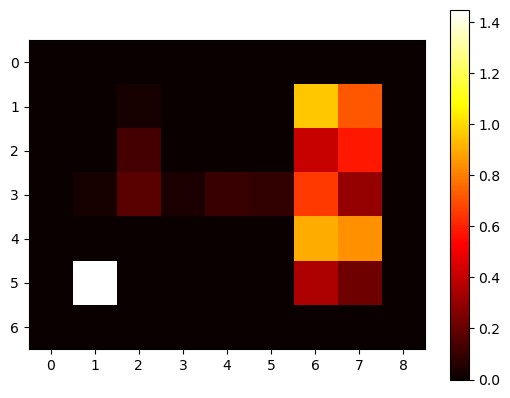

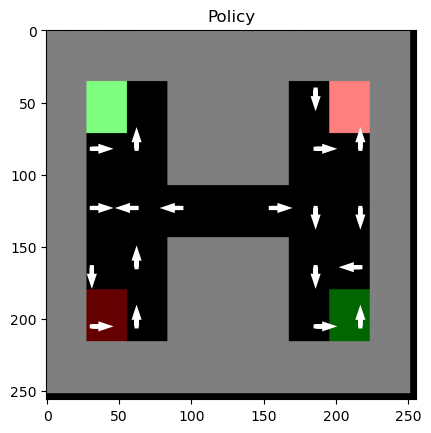

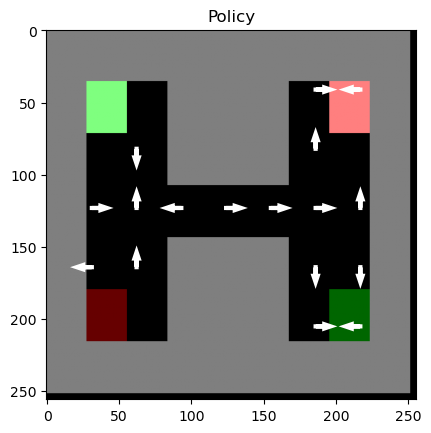

In [ ]:
Q_a1 = agents.q_val_1
Q_a1_fixed_p2=Q_a1[:,:,1,7,:,:,:]
#Q_a1_fixed_p2=Q_a1
Q_a1_mean=np.mean(Q_a1_fixed_p2,axis=tuple(i for i in range(Q_a1_fixed_p2.ndim) if i != 0 and i!=1 and i!=4))

#print(Q_a1_mean[:,:,0])
policy_function1 = np.argmax(Q_a1_mean , axis = 2)

Q_a2 = agents.q_val_2 
Q_a2_fixed_p1=Q_a2[1,1,:,:,:,:,:]
#Q_a2_fixed_p1=Q_a2
#print(Q_a2_fixed_p1.shape)
Q_a2_mean=np.mean(Q_a2_fixed_p1,axis=tuple(i for i in range(Q_a2_fixed_p1.ndim) if i != 0 and i!=1 and i!=4))

policy_function2 = np.argmax( Q_a2_mean , axis = 2)
plt.figure()
plt.imshow(Q_a2_mean[:,:,1], cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

def plot_policy( policy_function ):

    #plt.figure()
    env.reset()
    img=env.render('rgb_array')

    plt.imshow( img.astype('float')/255.0)

    
    for row in range( policy_function.shape[0] ):
        for col in range( policy_function.shape[1] ):
            if policy_function[row,col] == 0:
                continue 
            if policy_function[row,col] == 1:
                dx = 0; dy = .5
            if policy_function[row,col] == 2:
                dx = 0; dy = -.5
            if policy_function[row,col] == 3:
                dx = -.5; dy = 0
            if policy_function[row,col] == 4:
                dx = .5; dy = 0
            plt.arrow( col*31 , row*41 , dx*12, dy*12 ,shape='full', fc='w' , ec='w' ,lw=3, head_width=3)
            #plt.quiver(col*31,row*40,dx,dy ,color=(1.0,1.0,1.0))
    plt.title( 'Policy' )        
    plt.show() 
plot_policy(policy_function1)
plot_policy(policy_function2)